## **Load FaceNet Model from keras**
* There are a number of projects that provide tools to train FaceNet-based models and make use of pre-trained models.
* We will use the pre-trained Keras FaceNet model provided by Hiroki Taniai in this tutorial. It was trained on MS-Celeb-1M dataset and expects input images to be color, to have their pixel values whitened (standardized across all three channels), and to have a square shape of 160×160 pixels , and will output a face embedding as a 128 element vector.


In [ ]:
!pip install keras mtcnn facenet_pytorch

In [ ]:
# # example of loading the keras facenet model
# from keras.models import load_model
# # load the model
# model = load_model('/content/facenet_keras.h5')
# # summarize input and output shape
# print("model expected square colors shape " , model.inputs)
# print("model gives output face embedding vector shape", model.outputs)


# above code gives me some compatibilty issue

# so I usd the below code
import matplotlib.pyplot as plt
# from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image


**def a function to draw boundries on the face after detection faces in the images or video by mctnn**

In [ ]:
def draw_facebox(filename, result_list):
  # load the image
  data = plt.imread(filename)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # show the plot
  plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
  # load image from file


## **How to  detect faces for face recognition**
* before face_recognition we need to detect faces
* **Face detection** is the process of automatically loacting faces in a photograph and localizing them by drawing a bounding box around their extent
* we will used **Multi_Task Cascaded CNN **or **MTCNN** for face detection e,g finding and extracting faces from photo

**We can use the mtcnn library to create a face detector and extract faces for our use with the FaceNet face detector models in subsequent sections.**

The first step is to load an image as a NumPy array or load with the help of plt, which we can achieve using the PIL library or matplotlib and the open() function. We will also convert the image to RGB, just in case the image has an alpha channel or is black and white.

In [ ]:
# load image from file
import numpy as np
filename = "/content/IMG-20201230-WA0005.jpg"
pixel = plt.imread(filename)


In [ ]:
print(len(pixel))
print(pixel)


864
[[[134 120  94]
  [134 120  94]
  [134 120  94]
  ...
  [ 79  95  82]
  [ 79  95  82]
  [ 79  95  82]]

 [[136 122  96]
  [136 122  96]
  [136 122  96]
  ...
  [ 78  94  81]
  [ 79  95  82]
  [ 79  95  82]]

 [[138 123 100]
  [138 123 100]
  [138 123 100]
  ...
  [ 78  94  81]
  [ 78  94  81]
  [ 78  94  81]]

 ...

 [[  7  11  22]
  [  7  11  22]
  [  7  11  22]
  ...
  [ 53  63  55]
  [ 52  62  54]
  [ 53  63  55]]

 [[  7  11  22]
  [  7  11  22]
  [  7  11  22]
  ...
  [ 56  66  58]
  [ 59  69  61]
  [ 61  71  63]]

 [[  7  11  22]
  [  7  11  22]
  [  7  11  22]
  ...
  [ 60  70  62]
  [ 65  75  67]
  [ 69  79  71]]]


**Next , we can create an MTCNN face detector class and use it to detect all faces in the loaded photograph**

In [ ]:
# create MTCNN face detector class, using it default weights
detector = MTCNN()

# detect faces in the images
results = detector.detect_faces(pixel)
print(results)

1/1 [==============================] - 0s 127ms/step
[{'box': [421, 136, 134, 185], 'confidence': 0.999992847442627, 'keypoints': {'left_eye': (459, 207), 'right_eye': (528, 211), 'nose': (496, 255), 'mouth_left': (462, 276), 'mouth_right': (520, 279)}}, {'box': [778, 133, 225, 305], 'confidence': 0.9999895095825195, 'keypoints': {'left_eye': (833, 256), 'right_eye': (939, 258), 'nose': (878, 317), 'mouth_left': (838, 371), 'mouth_right': (923, 373)}}, {'box': [49, 170, 182, 214], 'confidence': 0.999976634979248, 'keypoints': {'left_eye': (115, 247), 'right_eye': (197, 242), 'nose': (164, 299), 'mouth_left': (126, 337), 'mouth_right': (194, 335)}}]


**mtcnn--> detect faces in the images/videos Now I passed the result to the "draw_facebox" to draw boundry on the face in the imags**


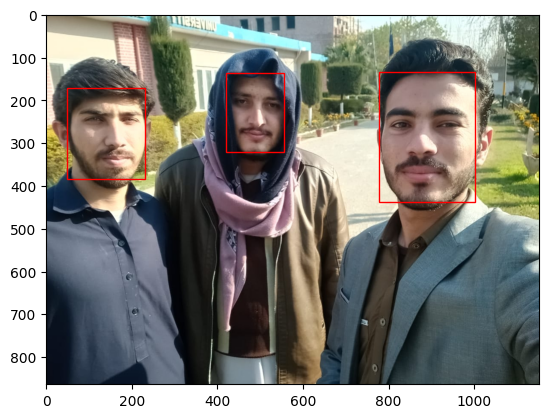

In [ ]:
# display faces on the original image
draw_facebox(filename, results)

**Load InceptionResnetv1 in eval mode**

In [ ]:
resnet = InceptionResnetV1(pretrained = 'vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
resnet

In [ ]:
results

In [ ]:
results[0]['keypoints']['left_eye'][0]

459

In [ ]:
type(results)   # so list has no attribute shape

list

In [ ]:
from facenet_pytorch import MTCNN , InceptionResnetV1
import torch
from PIL import Image
import numpy as py

detector = MTCNN(image_size = 250)

# open image file
img = Image.open("/content/IMG-20201230-WA0005.jpg")

#detect faces in the image with the help of mtcnn
boxes , _ = detector.detect(img)
resnet = InceptionResnetV1(pretrained = 'vggface2').eval()

In [ ]:
len(boxes)

3

In [ ]:
import torchvision.transforms as transforms
# Define a transform to resize and normalize the image
transform = transforms.Compose([
    transforms.Resize((160, 160)),  #b/z model input shape must be 160,160, output 128 tensor
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



In [ ]:
transforms

<module 'torchvision.transforms' from '/usr/local/lib/python3.10/dist-packages/torchvision/transforms/__init__.py'>

In [ ]:
face_embedding = []

for box in boxes:
  face = img.crop(box)
  face = face.convert("RGB")    # Ensure the image is in rgb formate
  face = transform(face)      # Apply the transforms to resize and normalize the image
  face = face.unsqueeze(0)  # Add a batch dimension

  # calculate embedding and append to list
  face_embedding.append(resnet(face))


In [ ]:
len(face_embedding)

3

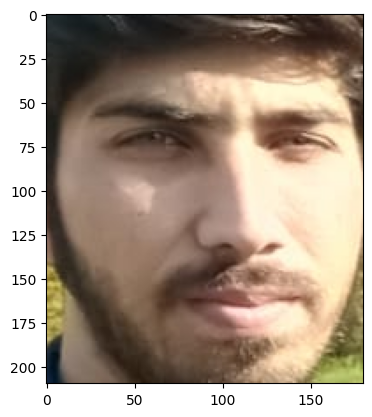

In [ ]:
facesss = img.crop(boxes[1])
plt.imshow(np.array(facesss))


In [ ]:
i = 0
for embedding in face_embedding:
  i += 1
  print(embedding.shape)
print(i)


torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
3


## combine all the code in on cell just for testing purpose
* select image which contain 3 or more images
* next select image which contain only one image which is present in the above image

In [ ]:
import matplotlib.pyplot as plt
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms


detector = MTCNN(image_size = 250)

# open image file
img = Image.open("/content/IMG-20201213-WA0037.jpg")

#detect faces in the image with the help of mtcnn
boxes , _ = detector.detect(img)
resnet = InceptionResnetV1(pretrained = 'vggface2').eval()

transform = transforms.Compose([
    transforms.Resize((160, 160)),  #b/z model input shape must be 160,160, output 128 tensor
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

faces_embeddingss = []

for box in boxes:
  face = img.crop(box)
  face = face.convert("RGB")    # Ensure the image is in rgb formate
  face = transform(face)      # Apply the transforms to resize and normalize the image
  face = face.unsqueeze(0)  # Add a batch dimension

  # calculate embedding and append to list
  faces_embeddingss.append(resnet(face))

  i = 0
for embedding in faces_embeddingss:
  i += 1
  print(embedding.shape)
print(i)



torch.Size([1, 512])
1


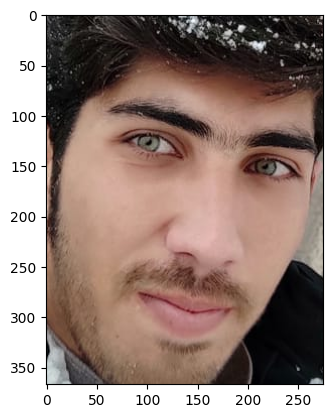

In [ ]:
facesss = img.crop(boxes[0])
plt.imshow(np.array(facesss))


##  Testing with another image

In [ ]:
import matplotlib.pyplot as plt
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms


detector = MTCNN(image_size = 250)

# open image file
img = Image.open("/content/IMG-20201230-WA0005.jpg")

#detect faces in the image with the help of mtcnn
boxes , _ = detector.detect(img)
resnet = InceptionResnetV1(pretrained = 'vggface2').eval()

transform = transforms.Compose([
    transforms.Resize((160, 160)),  #b/z model input shape must be 160,160, output 128 tensor
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

perez_embeddings = []

for box in boxes:
  face = img.crop(box)
  face = face.convert("RGB")    # Ensure the image is in rgb formate
  face = transform(face)      # Apply the transforms to resize and normalize the image
  face = face.unsqueeze(0)  # Add a batch dimension

  # calculate embedding and append to list
  perez_embeddings.append(resnet(face))

  i = 0
for embedding in perez_embeddings:
  i += 1
  print(embedding.shape)
print(i)



torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
3


## Apply similirity approach to get image from previous face_embedding and perez_embeddings

In [ ]:
similirity = []

for embedding in faces_embeddingss:
  for perez_embedding in perez_embeddings:
    cos_sim = torch.nn.CosineSimilarity(dim = 1)
    sim = cos_sim(embedding, perez_embedding)
    similirity.append(sim)

In [ ]:
max_value = max(similirity)
max_index = similirity.index(max_value)
max_index


1

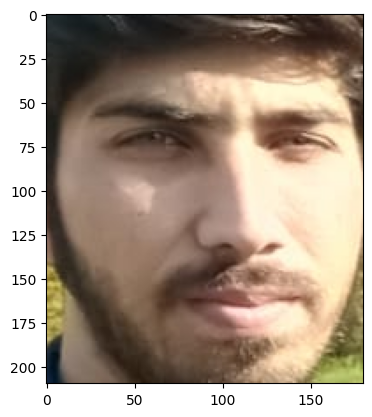

In [ ]:
facesss = img.crop(boxes[max_index])
plt.imshow(np.array(facesss))
